In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('dog.jpeg')
img.shape

(178, 283, 3)

In [ ]:
# converting it to a 2D vector
img_2D = np.float32(img.reshape((-1, 3)))
img_2D.dtype, img_2D.shape

(dtype('float32'), (50374, 3))

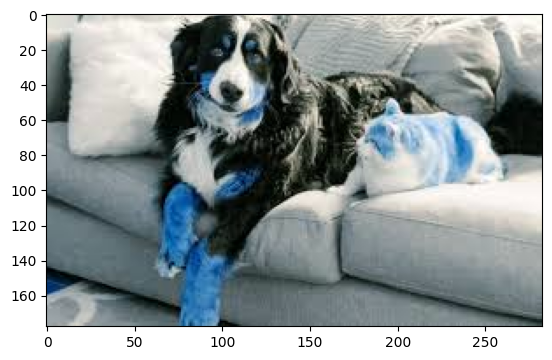

In [ ]:
plt.imshow(img)

## Thresholding

In [ ]:
threshold = 150

def simple_segment_threshold(img, threshold):
    temp = np.zeros_like(img)

    for height in range(img.shape[0]):
        for width in range(img.shape[1]):
            if any(img[height][width][c]>threshold for c in range(img.shape[2])):
                temp[height][width] =  [255.0, 255.0, 255.0] # white
            else:
                temp[height][width] = [0.0, 0.0, 0.0] # black

    return temp

def mean_threshold_segment(img, block_size, constant):
    temp = np.zeros_like(img)

    total_rows, total_cols, _ = img.shape

    for height in range(img.shape[0]):
        for width in range(img.shape[1]):
            # getting the threshold based on the neighborhood
            initial_row = max(height-block_size //2 , 0)
            final_row = min(height+block_size //2 +1,  total_rows)
            initial_col = max(width-block_size //2 , 0)
            final_col = min(width+block_size //2 +1 , total_cols)

            neighborhood = img[initial_row:final_row, initial_col:final_col, :]
            mean_intensity = np.mean(neighborhood)

            threshold = mean_intensity - constant

            # comparing mean pixel intensity of current pixel, not ANY in one of the 3 channels
            current_pixel_intensity = np.mean(img[height][width][:])

            if current_pixel_intensity>threshold:
                temp[height][width][:] =  [255.0, 255.0, 255.0] # white
            else:
                temp[height][width][:] = [0.0, 0.0, 0.0] # black

    return temp


In [ ]:
# mean_intensity

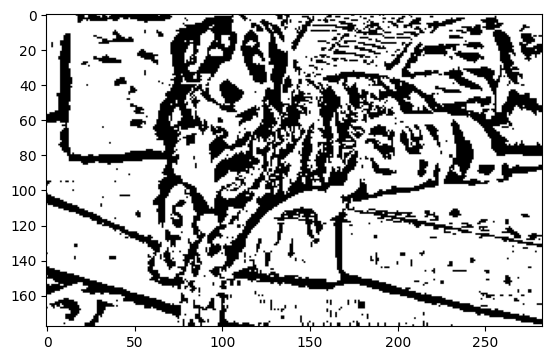

In [ ]:
plt.imshow(mean_threshold_segment(img, 13, 5))

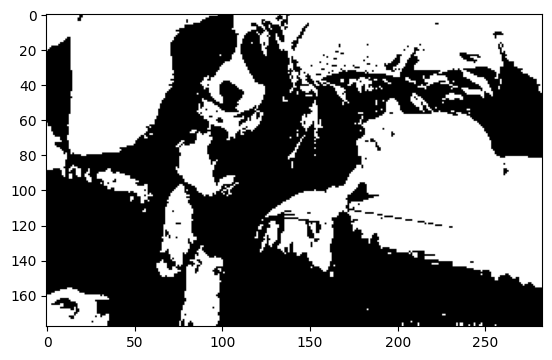

In [ ]:
segmented_img = segment_with_threshold(img, threshold)
plt.imshow(segmented_img)

### Gaussian Weighted Thresholding



In [42]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2))* np.exp(-((x-(size//2))**2)+(y-(size//2))**2)/(2*sigma**2), (size, size)
    )
    return kernel/np.sum(kernel)

In [43]:
gaussian_kernel(3, 0.3)

array([[0.0895069 , 0.03292775, 0.0895069 ],
       [0.24330499, 0.0895069 , 0.24330499],
       [0.0895069 , 0.03292775, 0.0895069 ]])

In [48]:
def gaussian_threshold_segment(img, kernel_size, sigma):
    temp = np.zeros_like(img)

    total_rows, total_cols = img.shape

    kernel = gaussian_kernel(kernel_size, sigma)

    pad_size = kernel_size // 2
    padded_image = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant', constant_values=0)


    for height in range(img.shape[0]):
        for width in range(img.shape[1]):
            neighborhood = padded_image[height:height+kernel_size, width:width+kernel_size]
            weighted_mean = np.sum(neighborhood * kernel)

            # comparing mean pixel intensity of current pixel, not ANY in one of the 3 channels
            current_pixel_intensity = np.mean(img[height][width])

            if current_pixel_intensity>weighted_mean:
                temp[height][width] =  255.0 # white
            else:
                temp[height][width] = 0.0 # black

    return temp


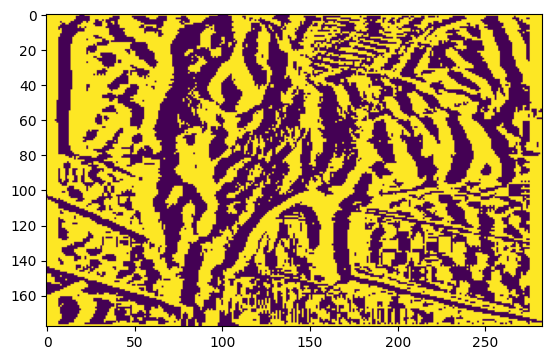

In [53]:
plt.imshow(gaussian_threshold_segment(img[:, :, 0], kernel_size=15, sigma=1.9))

In [56]:
# Define kernel sizes and sigmas for experimentation
kernel_sizes = [3, 5, 7, 9, 15]
sigmas = [0.5, 1.0, 1.5, 2.0, 3.0]

# Set up a plot grid
fig, axes = plt.subplots(len(sigmas), len(kernel_sizes) + 1, figsize=(15, 10))

# Plot the original image in the first column
for i in range(len(sigmas)):
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].axis('off')
    if i == 0:
        axes[i, 0].set_title('Original Image')

# Loop over kernel sizes and sigmas to apply Gaussian thresholding and display the results
for i, sigma in enumerate(sigmas):
    for j, kernel_size in enumerate(kernel_sizes):
        processed_img = gaussian_threshold_segment(img[:, :, 1], kernel_size=kernel_size, sigma=sigma)
        axes[i, j + 1].imshow(processed_img, cmap='gray')
        axes[i, j + 1].axis('off')
        if i == 0:  # Set titles for the top row
            axes[i, j + 1].set_title(f'Kernel: {kernel_size}')
        if j == 0:  # Add labels for each sigma in the leftmost column
            axes[i, 0].set_ylabel(f'Sigma: {sigma}', rotation=0, labelpad=50, va='center')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.